In [48]:
pip install yahoo_fin

In [0]:
import numpy as np
from yahoo_fin.stock_info import *
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn import preprocessing
from scipy import stats
import datetime as dt

In [0]:
def usr_input():
  days_ago = dt.date.today() - dt.timedelta(days = 200)
  Default_date = days_ago. strftime("%Y-%m-%d")
  Date = input('please enter date: ') or Default_date
  return Date

In [51]:
date = usr_input()

tickers = tickers_dow()
Data = []
for ticker in tickers:
  Data.append(get_data(ticker, start_date = date,index_as_date = True, interval = '1d')['adjclose'])
Data = pd.concat(Data,axis=1)
Ret = Data.pct_change().dropna()

please enter date: 2019-01-02


In [0]:
today = dt.date.today()
TodayDate = today.strftime("%Y-%m-%d")

In [0]:
port_val = 1000000 #the portafolio value
AMPSTvolpct = np.divide(np.ones((len(tickers),1)),len(tickers)) #equally distribute to different asset in that portafolio
PortReturn = np.dot(Ret, AMPSTvolpct)

Text(0, 0.5, 'Frequency')

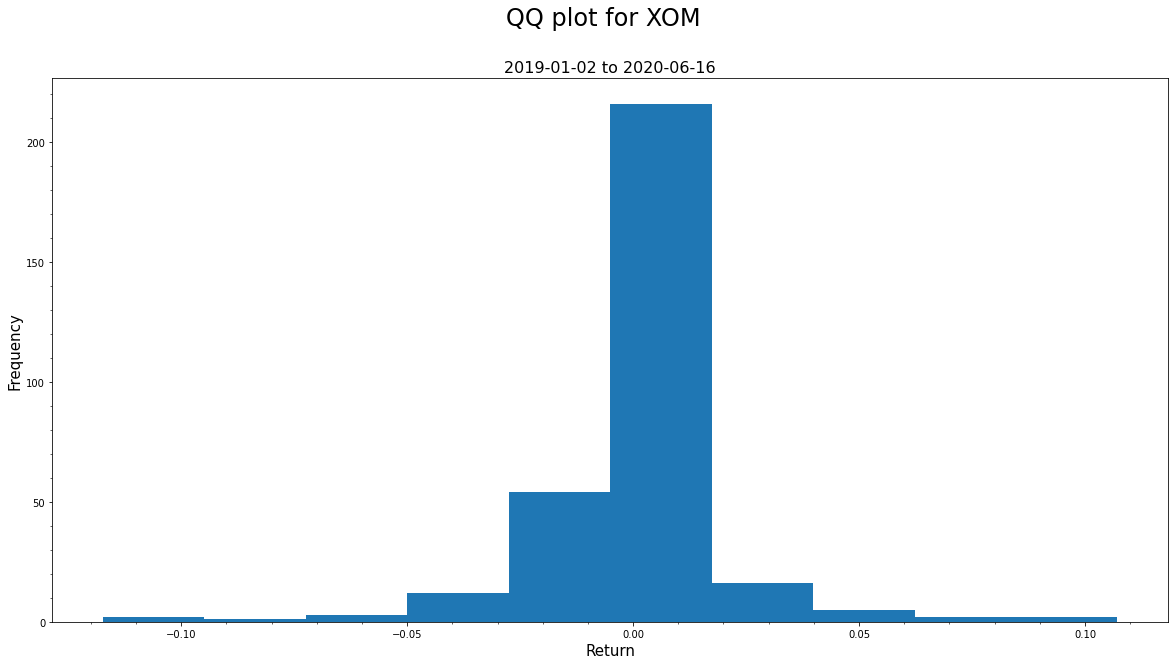

In [61]:
plt.figure(figsize=(20,10))
counts,bins,dum = plt.hist(PortReturn)
plt.suptitle('   QQ plot for '+ ticker,fontsize = 24)
plt.title(date+' to '+ TodayDate,fontsize = 16)
plt.minorticks_on()
plt.xlabel('Return',fontsize = 15)
plt.ylabel('Frequency',fontsize = 15)
#plt.suptitle('   hist for '+Dow Jones,fontsize = 24)
#plt.xlabel('Return',fontsize = 15)
#plt.ylabel('Frequency',fontsize = 15)

#plt.title(Start+' to '+End,fontsize = 16)

In [24]:
historical_var = -np.percentile(PortReturn,1)*port_val
print(historical_var)

68309.87241949243


In [25]:
covMatrix = np.cov(Ret.T,bias=True)
variance_pre = np.dot(AMPSTvolpct.T,covMatrix)
variance = np.dot(variance_pre,AMPSTvolpct)

VaR2 = np.sqrt(variance)*2.32*port_val
print(VaR2)

[[46411.61082743]]


In [47]:
today = dt.date.today()
d1 = today.strftime("%d/%m/%Y")
print(d1)

16/06/2020
